In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.io as data
import random

In [2]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        #print(alpha)
        #print(f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2)
        #print(f(x - alpha * grad_f(x)))
        #print( f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2)

        if alpha < 1e-3:
            print("toooooo small")
            break
    #print(x)
    return alpha

In [3]:
# f: the function f(x) we want to optimize.

def GD (f, g_f, x0, kmax, tolf, tolx):
    x_k = [np.array(x0)] * kmax    
    x_k[0] = x0
    i=1

    f_val = [f(x0)]
    grads = [g_f(x0)]
    err = [np.linalg.norm(grads[0], 2)]
    x = [x0]
    a = []

    condition = True
    while condition:
        # updating alpha, we can choose a static value or by using backtraking choose it dnamically
        alpha = backtracking(f, g_f, x_k[i-1])
        # updating x_k
        x_k[i] = x_k[i-1] - alpha*g_f(x_k[i-1])
        #print(x_k[i])
        x.append(x_k[i])
        f_val.append(f(x_k[i]))
        grads.append(g_f(x_k[i-1]))
        err.append(np.linalg.norm(g_f(x_k[i]), 2))
        a.append(alpha)

        condition1 = (np.linalg.norm(x_k[i] - x_k[i-1]) >= np.linalg.norm(tolx))
        condition2 = (np.linalg.norm(f(x_k[i]) - f(x_k[i-1])) >= np.linalg.norm(tolf))
        i+=1
        if not np.all(condition1):
            print('Stopping criteria -> condition 1')
        if not np.all(condition2):
            print('Stopping criteria -> condition 2')
        if not i<kmax:
            print('Stopping criteria -> k max')

        condition = (i<kmax) and np.all(condition1) and np.all(condition2) 
        



    return x, i, np.array(f_val), np.array(grads), np.array(err), a # I've add the alpha value in
                                                                        # the output



In [4]:
# f: the function f(x) we want to optimize.

def GD_no_bt (f, g_f, x0, alpha, kmax, tolf, tolx):
    x_k = [np.array(x0)] * kmax    
    x_k[0] = x0
    i=1

    f_val = [f(x0)]
    grads = [g_f(x0)]
    err = [np.linalg.norm(grads[0], 2)]
    x = [x0]


    condition = True
    while condition:
        x_k[i] = x_k[i-1] - alpha*g_f(x_k[i-1])
        #print(x_k[i])
        x.append(x_k[i])
        f_val.append(f(x_k[i]))
        grads.append(g_f(x_k[i-1]))
        err.append(np.linalg.norm(g_f(x_k), 2))

        
        condition1 = (np.linalg.norm(x_k[i] - x_k[i-1]) >= np.linalg.norm(tolx))
        condition2 = (np.linalg.norm(f(x_k[i]) - f(x_k[i-1])) >= np.linalg.norm(tolf))
        i+=1
        condition = (i<kmax) and np.all(condition1) and np.all(condition2) 
        
        


    return x, i, np.array(f_val), np.array(grads), np.array(err), alpha # I've add the alpha value in
                                                                        # the output


In [5]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1- 3)**2 + (x2-1)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2 * (x[0] - 3), 2 * (x[1] - 1)])


In [6]:
tolx = 0.00001
tolf = 0.00001


x, k, f_val, grads, err, alpha = GD(f, grad_f, np.array([0,0]), 1000, tolx, tolf)

print(f"Number of iterations: {k}")
print(f"Final x: {x[-1]}")
print(f"k: {k}")
print(f"Minimum value of f(x): {f_val[-1]}")
print(f"Gradient at the final x: {grads[-1]}")
print(f"Norm of the gradient at the final x: {err[-1]}")
print(f"Final alpha: {alpha}")



Stopping criteria -> condition 2
Number of iterations: 49
Final x: [2.99506249 0.99835416]
k: 49
Minimum value of f(x): 2.7087759828379503e-05
Gradient at the final x: [-0.01128573 -0.00376191]
Norm of the gradient at the final x: 0.010409180530354828
Final alpha: [0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625]


In [7]:
print(f"X: {x}")
print(f"\nValue of f(x): {f_val}")
print(f"\nGradient at the final x: {grads}")
print(f"Alpha: {alpha}")

X: [array([0, 0]), array([0.375, 0.125]), array([0.703125, 0.234375]), array([0.99023438, 0.33007812]), array([1.24145508, 0.41381836]), array([1.46127319, 0.48709106]), array([1.65361404, 0.55120468]), array([1.82191229, 0.6073041 ]), array([1.96917325, 0.65639108]), array([2.0980266, 0.6993422]), array([2.21077327, 0.73692442]), array([2.30942661, 0.76980887]), array([2.39574829, 0.79858276]), array([2.47127975, 0.82375992]), array([2.53736978, 0.84578993]), array([2.59519856, 0.86506619]), array([2.64579874, 0.88193291]), array([2.6900739, 0.8966913]), array([2.72881466, 0.90960489]), array([2.76271283, 0.92090428]), array([2.79237372, 0.93079124]), array([2.81832701, 0.93944234]), array([2.84103613, 0.94701204]), array([2.86090662, 0.95363554]), array([2.87829329, 0.9594311 ]), array([2.89350663, 0.96450221]), array([2.9068183 , 0.96893943]), array([2.91846601, 0.972822  ]), array([2.92865776, 0.97621925]), array([2.93757554, 0.97919185]), array([2.9453786 , 0.98179287]), array([2.

In [8]:
tolx = 0.00001
tolf = 0.00001
alpha_i = 0.01
x_nb, k_nb, f_val_nb, grads_nb, err_nb, alpha_nb = GD_no_bt(f, grad_f, np.array([0,0]), alpha_i, 1000, tolx, tolf)


print(f"Number of iterations: {k_nb}")
print(f"Final x: {x_nb[-1]}")
print(f"k: {k_nb}")
print(f"Minimum value of f(x): {f_val_nb[-1]}")
print(f"Gradient at the final x: {grads_nb[-1]}")
print(f"Norm of the gradient at the final x: {err_nb[-1]}")
print(f"Final alpha: {alpha_nb}")

Number of iterations: 265
Final x: [2.98551878 0.99517293]
k: 265
Minimum value of f(x): 0.00023300646205155688
Gradient at the final x: [-0.02955352 -0.00985117]
Norm of the gradient at the final x: 8.909158055240187
Final alpha: 0.01


In [9]:
X_norm = []
for i in x:
    X_norm.append(np.linalg.norm(i- [3,1], 1))

X_norm_nb = []
for i in x_nb:
    X_norm_nb.append(np.linalg.norm(i- [3,1], 1))

X_norm_T = []
for i in x:
    X_norm_T.append(np.linalg.norm([3,1] - i, 2))

X_norm_nb_T = []
for i in x_nb:
    X_norm_nb_T.append(np.linalg.norm([3,1] - i, 2))


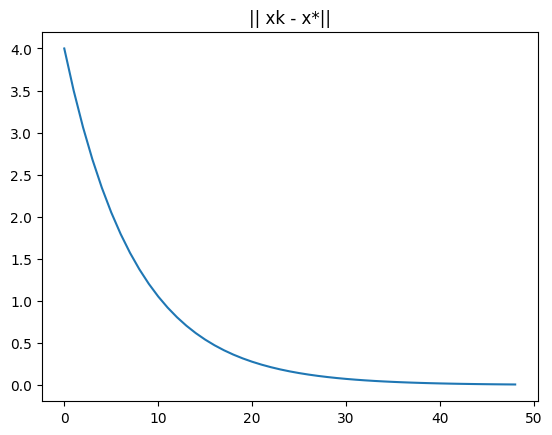

In [10]:
plt.plot(X_norm)
plt.title(f"|| xk - x*||1")
plt.show()

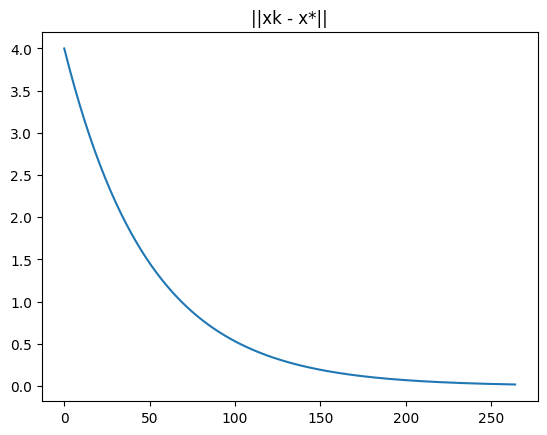

In [11]:
plt.plot(X_norm_nb)
plt.title(f"||xk - x*||1")
plt.show()

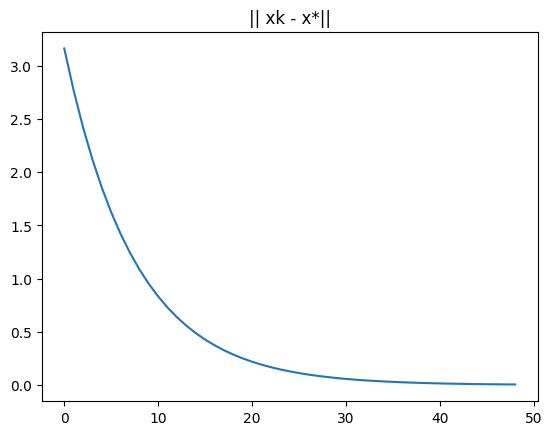

In [12]:
plt.plot(X_norm_T)
plt.title(f"|| xk - x*||2 no backt.")
plt.show()

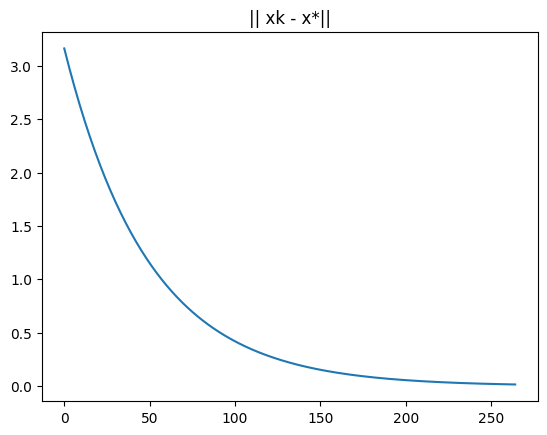

In [13]:
plt.plot(X_norm_nb_T)
plt.title(f"|| xk - x*||2 no backt.")
plt.show()

In [14]:
print(np.linalg.norm([3,1] - x[-1]))
print(np.linalg.norm([3,1] - x_nb[-1]))


0.005204590265177414
0.015264549192542729


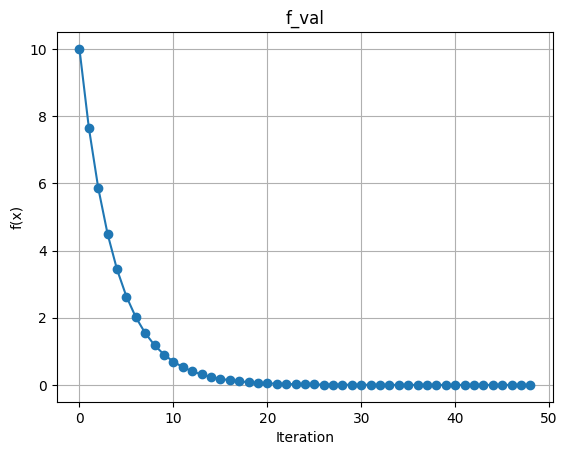

In [15]:
plt.plot(range(len(f_val)), f_val, marker='o')
plt.title('f_val')
plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

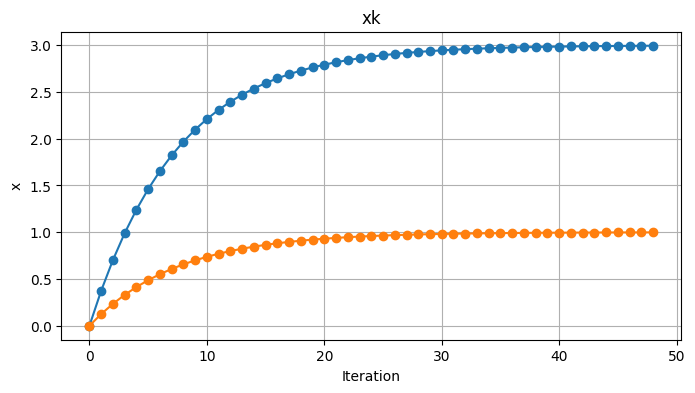

In [16]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(x)), x, marker='o')
plt.title('xk')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.grid(True)
plt.show()

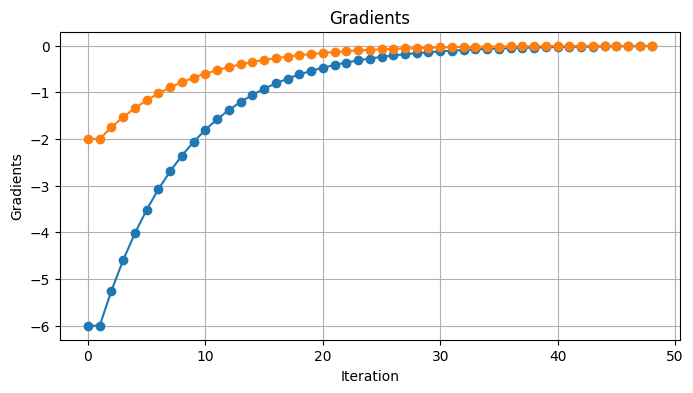

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(grads)), grads, marker='o')
plt.title('Gradients')
plt.xlabel('Iteration')
plt.ylabel('Gradients')
plt.grid(True)
plt.show()

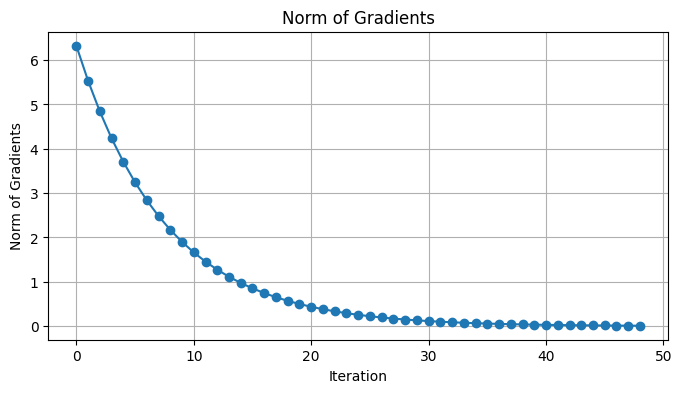

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(err)), err, marker='o')
plt.title('Norm of Gradients')
plt.xlabel('Iteration')
plt.ylabel('Norm of Gradients')
plt.grid(True)
plt.show()

In [21]:
def f1(x):
    x1, x2 = x[0], x[1]
    return 10 * (x1 - 1)**2 + (x2 - 2)**2

def grad_f1(x):
    x1, x2 = x[0], x[1]
    return np.array([20 * (x1 - 1), 2 * (x2 - 2)])



In [22]:
def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    al = 1
    c = 0.8
    tau = 0.25
    
    while f(x - al * grad_f(x)) > f(x) - c * al * np.linalg.norm(grad_f(x), 2) ** 2:
        al = tau * al
       
        #print(al)
        #print('-')
        #print(f(x - al * grad_f(x)) > f(x) - c * al * np.linalg.norm(grad_f(x), 2) ** 2)
        #print(f(x - al * grad_f(x)))
        #print( f(x) - c * al * np.linalg.norm(grad_f(x), 2) ** 2)
        #print('-') 
        

        if al < 1e-3:
            print("toooooo small")
            break
    #print(x)
    return al

In [23]:
# f: the function f(x) we want to optimize.

def GD (f, g_f, x0, kmax, tolf, tolx):
    x_k = [np.array(x0)] * kmax    
    x_k[0] = x0
    i=1

    f_val = [f(x0)]
    grads = [g_f(x0)]
    err = [np.linalg.norm(grads[0], 2)]
    x = [x0]
    a = []

    condition = True
    while condition:
        # updating alpha, we can choose a static value or by using backtraking choose it dnamically
        alpha  = backtracking(f, g_f, x_k[i-1])
        # updating x_k
        x_k[i] = x_k[i-1] - alpha *g_f(x_k[i-1])
        #print(x_k[i])
        x.append(x_k[i])
        f_val.append(f(x_k[i]))
        grads.append(g_f(x_k[i-1]))
        err.append(np.linalg.norm(g_f(x_k[i]), 2))
        a.append(alpha )

        condition1 = (np.linalg.norm(x_k[i] - x_k[i-1]) >= np.linalg.norm(tolx))
        condition2 = (np.linalg.norm(f(x_k[i]) - f(x_k[i-1])) >= np.linalg.norm(tolf))
        i+=1
        if not np.all(condition1):
            print('Stopping criteria -> condition 1')
        if not np.all(condition2):
            print('Stopping criteria -> condition 2')
        if not i<kmax:
            print('Stopping criteria -> k max')

        condition = (i<kmax) and np.all(condition1) and np.all(condition2) 
        



    return x, i, np.array(f_val), np.array(grads), np.array(err), a # I've add the alpha value in
                                                                        # the output

In [24]:
tolx = 0.00001
tolf = 0.00001

x_1, k_1, f_val_1, grads_1, err_1, alpha_1 = GD(f1, grad_f1, np.array([0,0]), 1000, tolx, tolf)


print(f"Number of iterations: {k_1}")
print(f"Final x: {x_1[-1]}")
print(f"k: {k_1}")
print(f"Minimum value of f(x): {f_val_1[-1]}")
print(f"Gradient at the final x: {grads_1[-1]}")
print(f"Norm of the gradient at the final x: {err_1[-1]}")
print(f"Final alpha: {alpha_1}")

Stopping criteria -> condition 2
Number of iterations: 51
Final x: [1.         1.99486124]
k: 51
Minimum value of f(x): 2.640684817207277e-05
Gradient at the final x: [ 0.         -0.01174574]
Norm of the gradient at the final x: 0.010277518800191565
Final alpha: [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625]


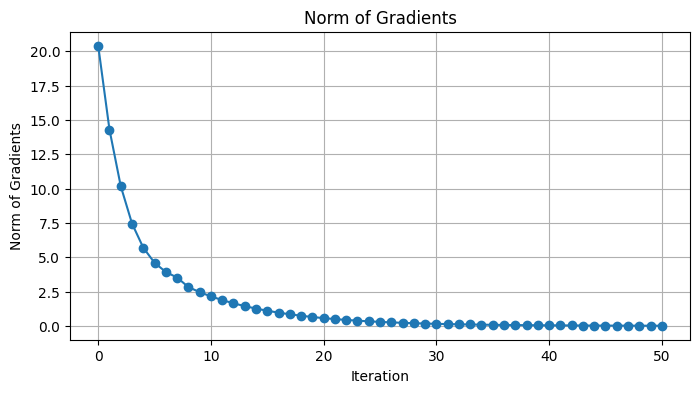

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(err_1)), err_1, marker='o')
plt.title('Norm of Gradients')
plt.xlabel('Iteration')
plt.ylabel('Norm of Gradients')
plt.grid(True)
plt.show()

In [26]:
X_norm_1 = []
for i in x_1:
    X_norm_1.append(np.linalg.norm(i- [1,2], 1))

X_norm_1_T = []
for i in x_1:
    X_norm_1_T.append(np.linalg.norm([1,2] - i, 2))


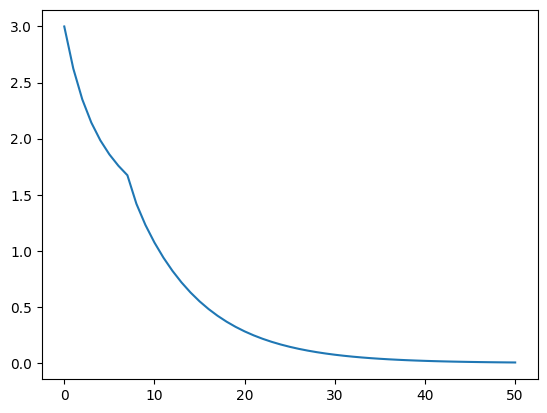

In [27]:
plt.plot(X_norm_1)
plt.title('X_norm')
plt.show()

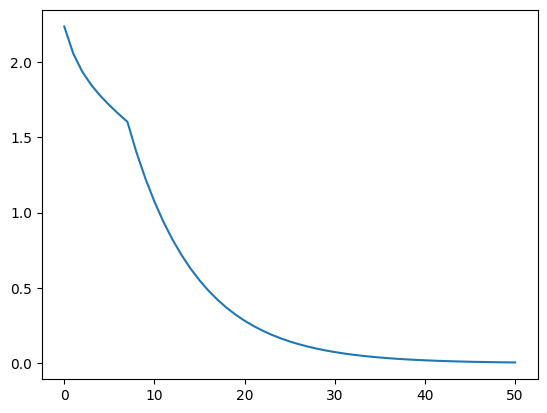

In [28]:
plt.plot(X_norm_1_T)
plt.title('X_norm')

plt.show()

In [29]:
print(f"X: {x_1}")
print(f"\nValue of f(x): {f_val_1}")
print(f"\nGradient at the final x: {grads_1}")
print(f"Alpha: {alpha_1}")

X: [array([0, 0]), array([0.3125, 0.0625]), array([0.52734375, 0.12304688]), array([0.67504883, 0.18170166]), array([0.77659607, 0.23852348]), array([0.8464098 , 0.29356962]), array([0.89440674, 0.34689557]), array([0.92740463, 0.39855509]), array([1.01814884, 0.5987357 ]), array([0.99546279, 0.77389374]), array([1.0011343 , 0.92715702]), array([0.99971642, 1.06126239]), array([1.00007089, 1.17860459]), array([0.99998228, 1.28127902]), array([1.00000443, 1.37111914]), array([0.99999889, 1.44972925]), array([1.00000028, 1.51851309]), array([0.99999993, 1.57869896]), array([1.00000002, 1.63136159]), array([1.        , 1.67744139]), array([1.        , 1.71776122]), array([1.        , 1.75304106]), array([1.        , 1.78391093]), array([1.        , 1.81092206]), array([1.        , 1.83455681]), array([1.        , 1.85523721]), array([1.        , 1.87333255]), array([1.        , 1.88916599]), array([1.        , 1.90302024]), array([1.        , 1.91514271]), array([1.        , 1.92574987]),

In [30]:
def backtracking_n(f, grad_f, x, n):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    al = 1
    c = 0.8
    tau = 0.25
    while f(x - al * grad_f(x, n),n) > f(x, n) - c * al * np.linalg.norm(grad_f(x, n), 2) ** 2:
        al = tau * al
       
        #print(al)
        #print('-')
        #print(f(x - al * grad_f(x)) > f(x) - c * al * np.linalg.norm(grad_f(x), 2) ** 2)
        #print(f(x - al * grad_f(x)))
        #print( f(x) - c * al * np.linalg.norm(grad_f(x), 2) ** 2)
        #print('-') 
        

        if al < 1e-3:
            print("toooooo small")
            break
    #print(x)
    return al

In [31]:
# f: the function f(x) we want to optimize.

def GD_n (f, g_f, x0, kmax, tolf, tolx,n):
    x_k = [np.array(x0)] * kmax    
    x_k[0] = x0
    i=1

    f_val = [f(x0, n)]
    grads = [g_f(x0, n)]
    err = [np.linalg.norm(grads[0], 2)]
    x = [x0]
    a = []

    condition = True
    while condition:
        #print(x_k[i-1])
        # updating alpha, we can choose a static value or by using backtraking choose it dnamically
        alpha  = backtracking_n(f, g_f, x_k[i-1], n)
        # updating x_k
        x_k[i] = x_k[i-1] - alpha *g_f(x_k[i-1], n)
        #print(x_k[i])
        x.append(x_k[i])
        f_val.append(f(x_k[i], n))
        grads.append(g_f(x_k[i-1], n))
        err.append(np.linalg.norm(g_f(x_k[i], n), 2))
        a.append(alpha )

        condition1 = (np.linalg.norm(x_k[i] - x_k[i-1]) >= np.linalg.norm(tolx))
        condition2 = (np.linalg.norm(f(x_k[i], n) - f(x_k[i-1], n)) >= np.linalg.norm(tolf))


        i+=1
        if not np.all(condition1):
            print('Stopping criteria -> condition 1')
        if not np.all(condition2):
            print('Stopping criteria -> condition 2')
        if not i<kmax:
            print('Stopping criteria -> k max')

        condition = (i<kmax) and np.all(condition1) and np.all(condition2) 
        



    return x, i, np.array(f_val), np.array(grads), np.array(err), a # I've add the alpha value in
                                                                        # the output

In [32]:
def f2(x, n):
    A = np.vander(np.linspace(0, 1, n), increasing=True)
    x_true = np.ones(n)
    b = A @ x_true

   
    return 0.5 * np.linalg.norm(A @ x - b)**2

def grad_f2(x, n):
    A = np.vander(np.linspace(0, 1, n), increasing=True)
    x_true = np.ones(n)
    b = A @ x_true

    return A.T @ (A @ x - b)





In [33]:
all_k_values = []
all_final_x_values = []
all_f_values = []
all_grad_values = []
all_err_values = []
all_alpha_values = []

for n in [5,10,15,20]:
    tolx = 0.00001
    tolf = 0.00001

    x_2, k_2, f_val_2, grads_2, err_2, alpha_2 = GD_n(f2, grad_f2, np.zeros(n), 1000, tolx, tolf, n)

    all_k_values.append(k_2)
    all_final_x_values.append(x_2[-1])
    all_f_values.append(f_val_2[-1])
    all_grad_values.append(grads_2[-1])
    all_err_values.append(err_2[-1])
    
    print(f"\n\n_____________________________________")
    print(f"\nN:{n}")
    print(f"Number of iterations: {k_2}")
    print(f"Final x: {x_2[-1]}")
    print(f"k: {k_2}")
    print(f"Minimum value of f(x): {f_val_2[-1]}")
    print(f"Gradient at the final x: {grads_2[-1]}")
    print(f"Norm of the gradient at the final x: {err_2[-1]}")
    print(f"Final alpha: {alpha_2[-1]}")


Stopping criteria -> condition 2


_____________________________________

N:5
Number of iterations: 42
Final x: [0.98482688 1.05638979 1.01674548 0.98026107 0.95136529]
k: 42
Minimum value of f(x): 0.00032012144011221385
Gradient at the final x: [-0.00306538  0.00389267 -0.00121907 -0.00439354 -0.00642905]
Norm of the gradient at the final x: 0.008431493512867544
Final alpha: 0.0625
Stopping criteria -> condition 2


_____________________________________

N:10
Number of iterations: 42
Final x: [0.9939221  0.99451406 1.0171047  1.02199118 1.01768476 1.00913403
 0.99890837 0.98832096 0.97803398 0.96836707]
k: 42
Minimum value of f(x): 0.0002684435680114466
Gradient at the final x: [-1.26212035e-02  3.29391258e-03  2.37669713e-03  3.26215995e-05
 -2.17635206e-03 -4.00998933e-03 -5.48760701e-03 -6.67348214e-03
 -7.62942012e-03 -8.40568212e-03]
Norm of the gradient at the final x: 0.017613593517191255
Final alpha: 0.015625
Stopping criteria -> condition 2


_________________________________

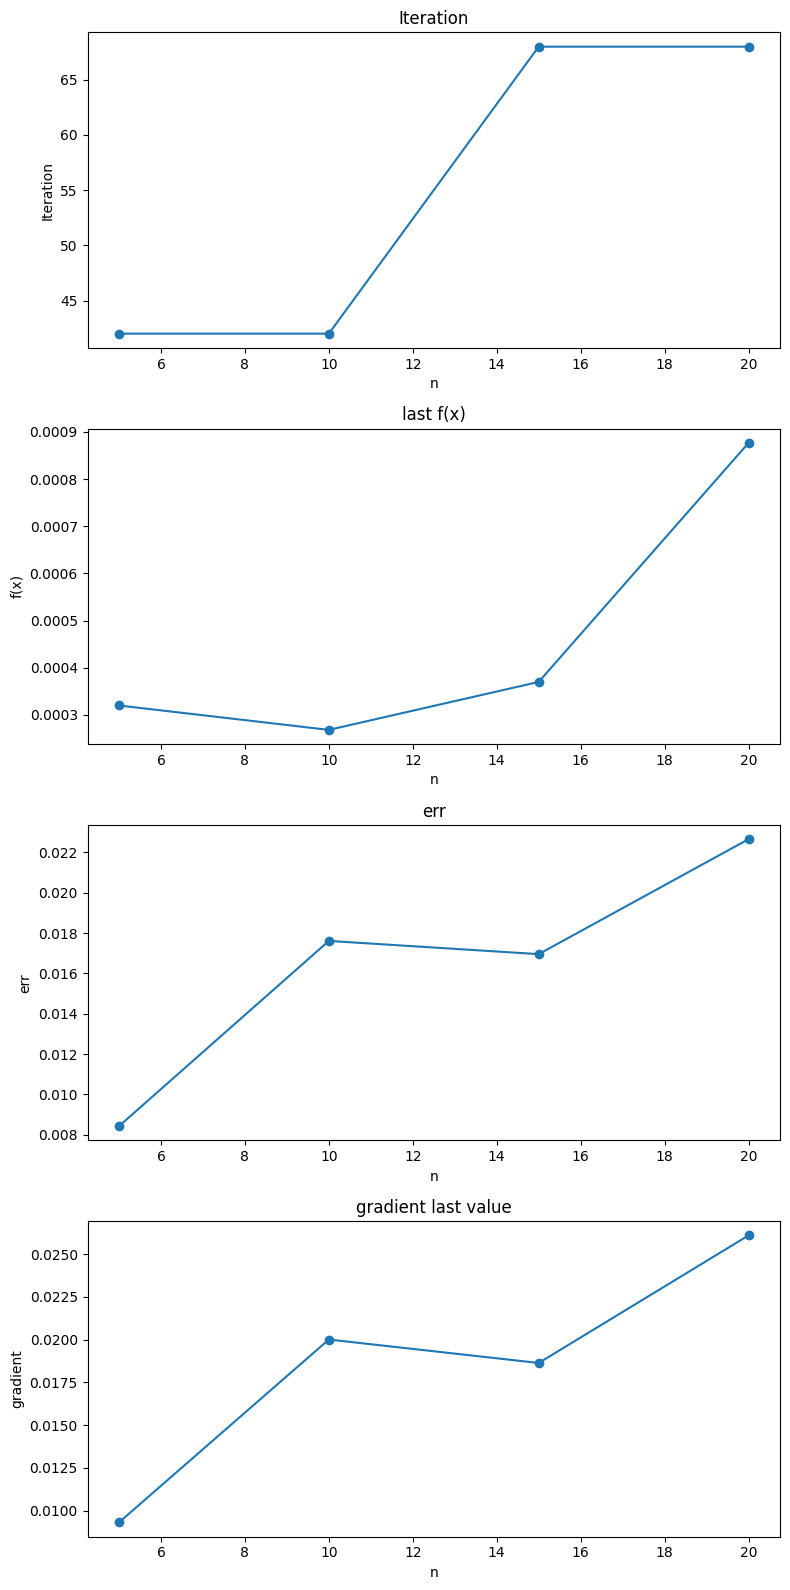

In [34]:
fig, axes = plt.subplots(4, 1, figsize=(8, 16))

# Plot k
axes[0].plot([5, 10, 15, 20], all_k_values, marker='o')
axes[0].set_title('Iteration')
axes[0].set_xlabel('n')
axes[0].set_ylabel('Iteration')

# Plot f(x)  last value
axes[1].plot([5, 10, 15, 20], all_f_values, marker='o')
axes[1].set_title('last f(x)')
axes[1].set_xlabel('n')
axes[1].set_ylabel('f(x)')

# Plot err
axes[2].plot([5, 10, 15, 20], all_err_values, marker='o')
axes[2].set_title('err')
axes[2].set_xlabel('n')
axes[2].set_ylabel('err')

# Plot gradient last value
axes[3].plot([5, 10, 15, 20], [np.linalg.norm(grad) for grad in all_grad_values], marker='o')
axes[3].set_title('gradient last value')
axes[3].set_xlabel('n')
axes[3].set_ylabel('gradient')

plt.tight_layout()
plt.show()

In [35]:
print(f"\n\n\nNumber of iterations: {k_2}")
print(f"Final x: {x_2[-1]}")
print(f"\nValue of f(x): {f_val_2}")
print(f"\nMinimum value of f(x): {f_val_2[-1]}")
print(f"Gradient at the final x: {grads_2[-1]}")
print(f"Norm of the gradient at the final x: {err_2[-1]}")
print(f"Final alpha: {alpha_2}")




Number of iterations: 68
Final x: [1.01066194 0.96311299 0.98375237 1.00285719 1.0153676  1.02221261
 1.02488517 1.02461951 1.0223281  1.0186655  1.01409784 1.008957
 1.00347971 0.99783495 0.99214325 0.98649018 0.98093596 0.97552231
 0.97027742 0.96521951]

Value of f(x): [3.75250886e+02 2.61811855e+02 1.83798832e+02 1.30036996e+02
 9.28873533e+01 6.71269233e+01 4.91836752e+01 3.66138213e+01
 2.77446866e+01 2.14306982e+01 1.68866553e+01 1.35737992e+01
 1.11219563e+01 9.27632721e+00 7.86111574e+00 6.75466340e+00
 5.87244660e+00 3.42978955e+00 2.24391061e+00 1.51154778e+00
 1.03850033e+00 7.29842248e-01 5.27168402e-01 3.93054485e-01
 3.03369957e-01 2.42538208e-01 2.00499392e-01 1.70753022e-01
 1.49095392e-01 1.32805072e-01 1.20117425e-01 8.52582068e-02
 6.56426946e-02 5.08725399e-02 3.95175190e-02 3.07749229e-02
 2.40409209e-02 1.88517788e-02 1.48509137e-02 1.17641130e-02
 9.38050447e-03 7.53792383e-03 6.11166252e-03 5.00581662e-03
 4.14663760e-03 3.47742988e-03 2.95466119e-03 2.54507

In [36]:
def f3(x, n):
    A = np.vander(np.linspace(0, 1, n), increasing=True)
    x_true = np.ones(n)
    b = A @ x_true
    t1 = 0.5 * np.linalg.norm(A @ x - b)**2
    t2 = 0.5 * lmbda * np.linalg.norm(x)**2

    return t1 + t2

def grad_f3(x, n):
    A = np.vander(np.linspace(0, 1, n), increasing=True)
    x_true = np.ones(n)
    b = A @ x_true
    t1 = A.T @ (A @ x - b)
    t2 = lmbda * x

    return t1 + t2

In [37]:

all_k_values_matrix = []
all_f_values_matrix = []
all_err_values_matrix = []

lmbda_values = [0.2, 0.5, 0.8]
for n in [5,10,15]:
    k_values_row = []
    f_values_row = []
    err_values_row = []

    for lmbda in lmbda_values:
        # Inizializza x0 a zero
        x0 = np.zeros(n)

        # Esegui ottimizzazione senza utilizzare le lambda functions
        x, k, f_val, grads, err, alpha = GD_n(f3, grad_f3, x0, 1000, tolx, tolf, n)

        k_values_row.append(k)
        f_values_row.append(f_val[-1])
        err_values_row.append(err[-1])


        print(f"\n\n_____________________________________")
        print(f"\nλ:{lmbda}  n:{n}")
        print(f"Number of iterations: {k}")
        print(f"Final x: {x[-1]}")
        print(f"Minimum value of f(x): {f_val[-1]}")
        print(f"Gradient at the final x: {grads[-1]}")
        print(f"Norm of the gradient at the final x: {err[-1]}")
        print(f"Final alpha: {alpha}")
  
    max_len = max(len(k_values_row), len(f_values_row), len(err_values_row))

    k_values_row += [0] * (max_len - len(k_values_row))
    f_values_row += [0] * (max_len - len(f_values_row))
    err_values_row += [0] * (max_len - len(err_values_row))

    all_k_values_matrix.append(k_values_row)
    all_f_values_matrix.append(f_values_row)
    all_err_values_matrix.append(err_values_row)

Stopping criteria -> condition 2


_____________________________________

λ:0.2  n:5
Number of iterations: 57
Final x: [1.00704169 1.02672712 0.97258885 0.92965499 0.89750514]
Minimum value of f(x): 0.4836120227717093
Gradient at the final x: [ 0.00127337  0.00282095 -0.00052879 -0.00252318 -0.00377507]
Norm of the gradient at the final x: 0.004553750836611463
Final alpha: [0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.25, 0.25, 0.25, 0.25]
Stopping criteria -> condition 2


_____________________________________

λ:0.5  n:5
Number of iterations: 52
Final x: [1.02581453 0.98567259

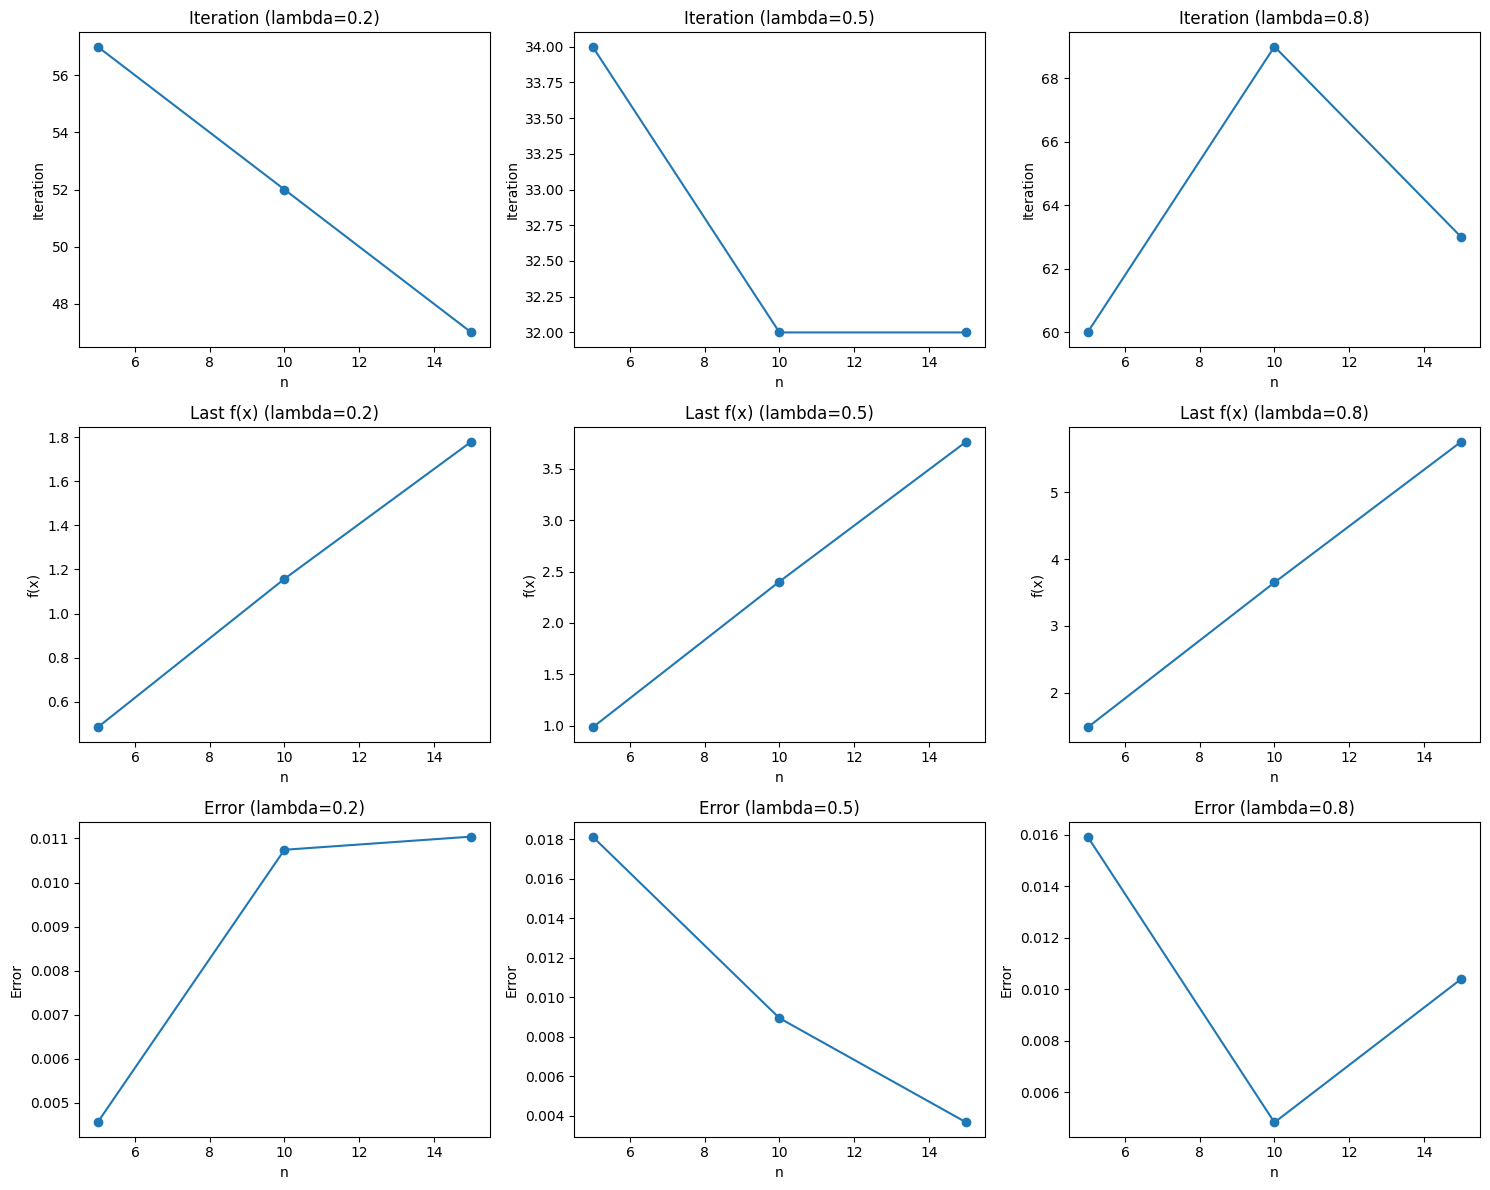

In [38]:
fig, axes = plt.subplots(3, len(lmbda_values), figsize=(15, 12))

for i, lmbda in enumerate(lmbda_values):
    # Plot k
    axes[0, i].plot([5, 10, 15], all_k_values_matrix[i], marker='o')
    axes[0, i].set_title(f'Iteration (lambda={lmbda})')
    axes[0, i].set_xlabel('n')
    axes[0, i].set_ylabel('Iteration')

    # Plot f(x) ultimo valore
    axes[1, i].plot([5, 10, 15], all_f_values_matrix[i], marker='o')
    axes[1, i].set_title(f'Last f(x) (lambda={lmbda})')
    axes[1, i].set_xlabel('n')
    axes[1, i].set_ylabel('f(x)')

    # Plot err
    axes[2, i].plot([5, 10, 15], all_err_values_matrix[i], marker='o')
    axes[2, i].set_title(f'Error (lambda={lmbda})')
    axes[2, i].set_xlabel('n')
    axes[2, i].set_ylabel('Error')

plt.tight_layout()
plt.show()#####################################################################non va

In [39]:
def f4(x):
    return x**4 + x**3 - 2*x**2 - 2*x

# Derivata prima di f4
def grad_f4(x):
    return 4*x**3 + 3*x**2 - 4*x - 2


In [40]:
tolx = 0.00001
tolf = 0.00001

x_4, k_4, f_val_4, grads_4, err_4, alpha_4 = GD(f4, grad_f4, np.array([0]), 1000, tolx, tolf)


print(f"Number of iterations: {k_4}")
print(f"Final x: {x_4[-1]}")
print(f"k: {k_4}")
print(f"Minimum value of f(x): {f_val_4[-1]}")
print(f"Gradient at the final x: {grads_4[-1]}")
print(f"Norm of the gradient at the final x: {err_4[-1]}")
print(f"Final alpha: {alpha_4}")

Stopping criteria -> condition 2
Number of iterations: 30
Final x: [0.9206366]
k: 30
Minimum value of f(x): [-2.03773325]
Gradient at the final x: [-0.02276728]
Norm of the gradient at the final x: 0.018608805772129422
Final alpha: [0.25, 0.0625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625]


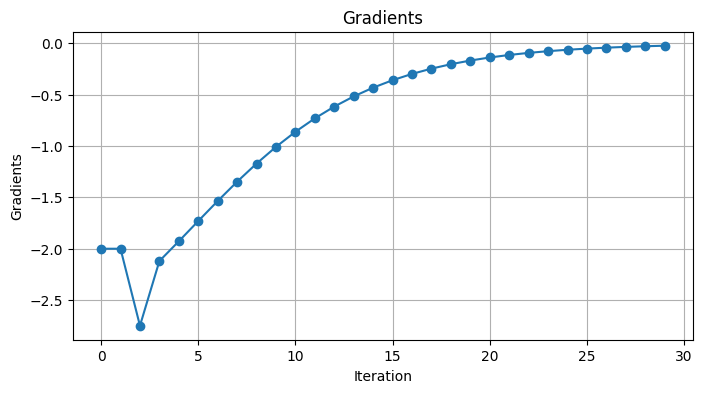

In [41]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(grads_4)), grads_4, marker='o')
plt.title('Gradients')
plt.xlabel('Iteration')
plt.ylabel('Gradients')
plt.grid(True)
plt.show()

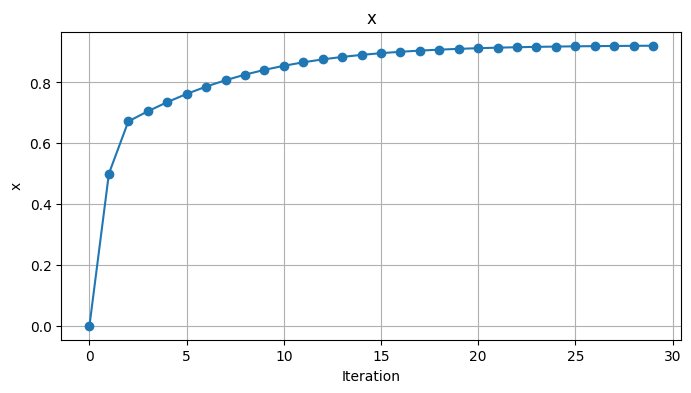

In [42]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(x_4)), x_4, marker='o')
plt.title('x')
plt.xlabel('Iteration')
plt.ylabel('x')
plt.grid(True)
plt.show()

In [43]:
tolx = 0.00001
tolf = 0.00001
x0_4 = np.array([-2.5])
x_4_1, k_4_1, f_val_4_1, grads_4_1, err_4_1, alpha_4_1 = GD(f4, grad_f4, x0_4, 1000, tolx, tolf)


print(f"Number of iterations: {k_4_1}")
print(f"Final x: {x_4_1[-1]}")
print(f"k: {k_4_1}")
print(f"Minimum value of f(x): {f_val_4_1[-1]}")
print(f"Gradient at the final x: {grads_4_1[-1]}")
print(f"Norm of the gradient at the final x: {err_4_1[-1]}")
print(f"Final alpha: {alpha_4_1}")

Stopping criteria -> condition 2
Number of iterations: 48
Final x: [-1.23548315]
k: 48
Minimum value of f(x): [-0.13778162]
Gradient at the final x: [-0.02496434]
Norm of the gradient at the final x: 0.02226945959247839
Final alpha: [0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625, 0.015625]


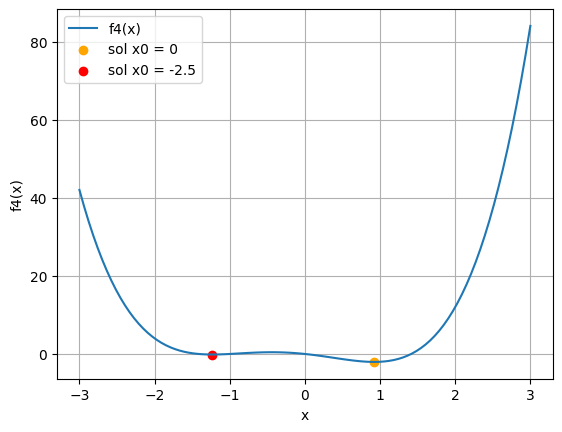

In [44]:
x_values = np.linspace(-3, 3, 100)
y_values = f4(x_values)
plt.plot(x_values, y_values, label='f4(x)')
plt.scatter([x_4[-1]], [f4(x_4[-1])], color='orange', label='sol x0 = 0')
plt.scatter([x_4_1[-1]], [f4(x_4_1[-1])], color='red', label='sol x0 = -2.5')
plt.xlabel('x')
plt.ylabel('f4(x)')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
c = True
x0_s = []
tolx = 0.00001
tolf = 0.00001
x0_4 = np.array([0.9])
while c:
    x_4_2, k_4_2, f_val_4_2, grads_4_2, err_4_2, alpha_4_2 = GD(f4, grad_f4, x0_4, 1000, tolx, tolf)
    print(f"Final x: {x_4_2[-1]}")
    x0_s.append(x0_4)
    if x_4_2[-1] < 0:
        c = False
    x0_4 = x0_4 - 0.01



Stopping criteria -> condition 2
Final x: [0.92058033]
Stopping criteria -> condition 2
Final x: [0.92061076]
Stopping criteria -> condition 2
Final x: [0.92047181]
Stopping criteria -> condition 2
Final x: [0.92042718]
Stopping criteria -> condition 2
Final x: [0.92044859]
Stopping criteria -> condition 2
Final x: [0.92051472]
Stopping criteria -> condition 2
Final x: [0.92060965]
Stopping criteria -> condition 2
Final x: [0.92038487]
Stopping criteria -> condition 2
Final x: [0.92053221]
Stopping criteria -> condition 2
Final x: [0.92068242]
Stopping criteria -> condition 2
Final x: [0.92051777]
Stopping criteria -> condition 2
Final x: [0.92069141]
Stopping criteria -> condition 2
Final x: [0.92054815]
Stopping criteria -> condition 2
Final x: [0.92040028]
Stopping criteria -> condition 2
Final x: [0.92060943]
Stopping criteria -> condition 2
Final x: [0.92048057]
Stopping criteria -> condition 2
Final x: [0.92069105]
Stopping criteria -> condition 2
Final x: [0.92057865]
Stopping c

Final x: [0.92064631]
Stopping criteria -> condition 2
Final x: [0.92056068]
Stopping criteria -> condition 2
Final x: [0.92047135]
Stopping criteria -> condition 2
Final x: [0.92037814]
Stopping criteria -> condition 2
Final x: [0.9206366]
Stopping criteria -> condition 2
Final x: [0.92049294]
Stopping criteria -> condition 2
Final x: [0.92039046]
Stopping criteria -> condition 2
Final x: [0.9206382]
Stopping criteria -> condition 2
Final x: [0.92054576]
Stopping criteria -> condition 2
Final x: [0.92044863]
Stopping criteria -> condition 2
Final x: [0.92069031]
Stopping criteria -> condition 2
Final x: [0.92060264]
Stopping criteria -> condition 2
Final x: [0.92051048]
Stopping criteria -> condition 2
Final x: [0.92041359]
Stopping criteria -> condition 2
Final x: [0.9206618]
Stopping criteria -> condition 2
Final x: [0.92057419]
Stopping criteria -> condition 2
Final x: [0.920482]
Stopping criteria -> condition 2
Final x: [0.92038498]
Stopping criteria -> condition 2
Final x: [0.920

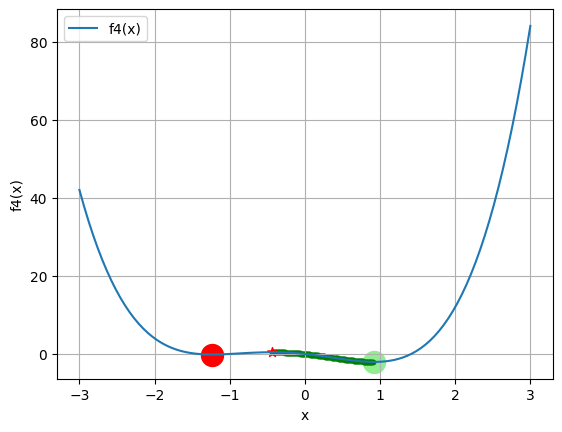

In [46]:
x_values = np.linspace(-3, 3, 100)
y_values = f4(x_values)
plt.plot(x_values, y_values, label='f4(x)')

plt.scatter([x_4[-1]], [f4(x_4[-1])],color='lightgreen', s=250)
plt.scatter([x_4_1[-1]], [f4(x_4_1[-1])], color='red', s=250)
for point in x0_s[:-1]:
    plt.scatter(point[0], f4(point[0]), color='green', s=10)

plt.scatter([x0_s[-1]], [f4(x0_s[-1])],marker='*', color='red', s=50)

plt.xlabel('x')
plt.ylabel('f4(x)')
plt.legend()
plt.grid(True)
plt.show()

# SDG

In [47]:
def test_train(X, Y, Ntrain):
    d, N = X.shape

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:, test_idx]
    Ytest = Y[test_idx]

    return Xtrain, Ytrain, Xtest, Ytest
# Define sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Compute the value of f
def f(w, X):
    return sigmoid((X@w).T)

# Compute the value of grad_f
def grad_f(w, X):
  
    return sigmoid(X@w)@(1-sigmoid(X@w)).T@X

# Value of the loss
def loss(f, w, D):
    X,Y = D
    return np.mean(np.square(f(w,X)-Y))

# Value of the gradient
def grad_loss(f, grad_f, w, D):
    X,Y = D
    return np.mean(grad_f(w, X).T*(f(w, X) - Y), axis=1)
    
def predict(w, X, threshold=0.5):
    return f(w, X) > threshold

def accuracy(predictions, true_labels):
    correct_predictions = np.sum(predictions == true_labels)
    total_samples = len(true_labels)
    accuracy = correct_predictions / total_samples
    
    return accuracy

In [48]:
def sgd_optimizer(f, grad_f, loss, grad_loss, w0, D, alpha, batch_size, n_epochs):
    
    X, y = D
    N = X.shape[0]
    d = w0.shape[0]
    idx = np.arange(0, N)
    
    # Initialization of history vectors
    w_history = np.zeros((n_epochs, d))  # Save weights at each iteration
    loss_history = np.zeros((n_epochs, batch_size))  # Save loss values at each iteration
    grad_norm_history = np.zeros((n_epochs, ))  # Save gradient norms at each iteration
    
    # Initialize weights
    w = w0  
    
    
    for epoch in range(n_epochs):
        # Shuffle the data at the beginning of each epoch
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Initialize a vector that saves the gradient of the loss at each iteration
        grad_loss_vec = []

        for batch_start in range(0, N, batch_size):
            batch_end = min(batch_start + batch_size, N)
            X_batch = X[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            
            # Compute the gradient of the loss
            gradient = grad_loss(f, grad_f, w, (X_batch, y_batch))
            grad_loss_vec.append(np.linalg.norm(gradient, 2))


            #print(f"w:  {w.shape} gradient loss vec: {grad_loss_vec}")
            # Update weights
            #print(w.shape)


            w = w - alpha * gradient[..., np.newaxis]


            #print(gradient.shape)
            #print(f"w:  {w.shape} gradient: {gradient.shape}")



        # Save the updated values
        add_w = w
        w_history[epoch] = add_w[:, 0]
        loss_history[epoch,:] = loss(f, w, (X, y))
        grad_norm_history[epoch] = np.mean(grad_loss_vec)
        
    return w_history, loss_history, grad_norm_history

In [49]:
def gd_optimizer(f, grad_f, loss, grad_loss, w0, D, alpha, n_epochs):
    X, y = D
    N = X.shape[0]
    d = w0.shape[0]

    # Initialization of history vectors
    w_history = np.zeros((n_epochs, d))  # Save weights at each iteration
    loss_history = np.zeros((n_epochs,))  # Save loss values at each iteration
    grad_norm_history = np.zeros((n_epochs,))  # Save gradient norms at each iteration

    # Initialize weights
    w = w0

    for epoch in range(n_epochs):
        # Compute the gradient of the loss
        gradient = grad_loss(f, grad_f, w, D)

        # Update weights
        w = w - alpha * gradient[..., np.newaxis]

        # Save the updated values
        add_w = w
        w_history[epoch] = add_w[:, 0]
        loss_history[epoch] = loss(f, w, D)
        grad_norm_history[epoch] = np.linalg.norm(gradient, 2)

    return w_history, loss_history, grad_norm_history

X: (256, 1707)
I: (1, 1707)
[319, 252, 202, 131, 122, 88, 151, 166, 144, 132]
275 131 144


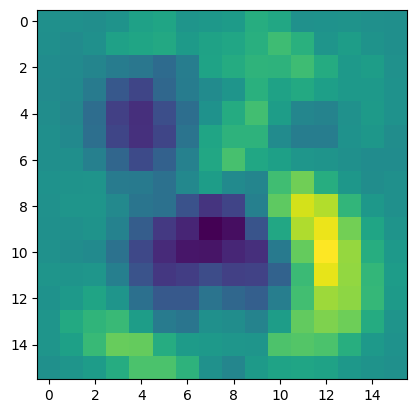

Accuratezza logistic regression: 0.9636363636363636


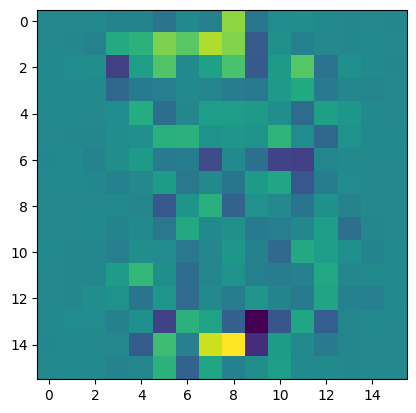

Accuratezza  GD: 0.509090909090909
(10, 257) (10, 20) (10,)


In [50]:
# Load the data
mnist = scipy.io.loadmat('MNIST.mat')

X = (mnist['X'])
I = (mnist['I'])

print("X:", X.shape)
print("I:", I.shape)

first_n = 3
second_n = 8

counter = [0,0,0,0,0,0,0,0,0,0]
i_list = list(I)
for n in range(10):
    counter[n] = np.count_nonzero(I == n)

print(counter)

c_col = np.where(np.logical_or(I == first_n, I == second_n))[1]
c1_col = np.where(I == first_n)[1]
c2_col = np.where(I == second_n)[1]


X = X[:,c_col]
Y = I[:,c_col]

print(len(c_col),len(c1_col),len(c2_col))

Ntrain = int((X.shape[1]*0.8))
Y = Y[0,:]

# To separate the train and the test
X_train, Y_train, X_test, Y_test = test_train(X,Y,Ntrain)


# To have 1 and 0 and not the number
Y_train = np.array(Y_train)
Y_train = (Y_train == first_n).astype(int)
Y_test = np.array(Y_test)
Y_test = (Y_test == first_n).astype(int)

X_train = X_train - np.mean(X_train, axis=1, keepdims=True)
X_test = X_test - np.mean(X_test, axis=1, keepdims=True)


X_train_I, Y_train_I, X_test_I, Y_test_I = X_train, Y_train, X_test, Y_test

k,N = X_train.shape

X_train = X_train.T
w0 = np.zeros((k + 1, 1))
batch_size = 20
n_epochs = 10
alpha = 0.001
n_epochs_gd = 3

# Creo x hat con la colonna di bias
Xhat = np.insert(X_train, 0, 1, axis=1)

w_history, loss_history, grad_norm_history = sgd_optimizer(f, grad_f, loss, grad_loss, w0, (Xhat, Y_train),alpha, batch_size, n_epochs)
w_history_2, loss_history_2, grad_norm_history_2 = gd_optimizer(f, grad_f, loss, grad_loss, w0, (Xhat, Y_train),alpha, n_epochs_gd)


Xtest = np.concatenate((np.ones((1, X_test.shape[1])), X_test), axis=0)


X_test = np.insert(X_test, 0, 1, axis=0)
X_test = X_test.T
preds = predict(w_history[-1][...,np.newaxis], X_test)
plt.imshow(w_history[-1,1:].reshape(16,16))
plt.show()

test_accuracy = accuracy(preds, Y_test)

print(f"Accuratezza logistic regression: {test_accuracy}")


preds_2 = predict(w_history_2[-1][...,np.newaxis], X_test)
plt.imshow(w_history_2[-1,1:].reshape(16,16))
plt.show()

test_accuracy = accuracy(preds_2, Y_test)

print(f"Accuratezza  GD: {test_accuracy}")


print(w_history.shape, loss_history.shape, grad_norm_history.shape)
X = ()


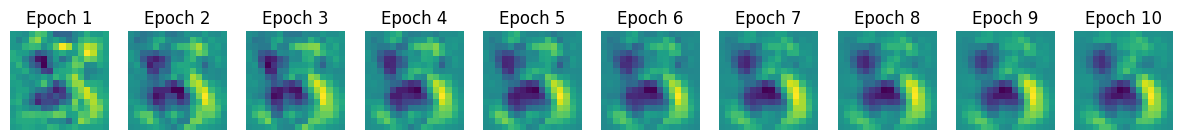

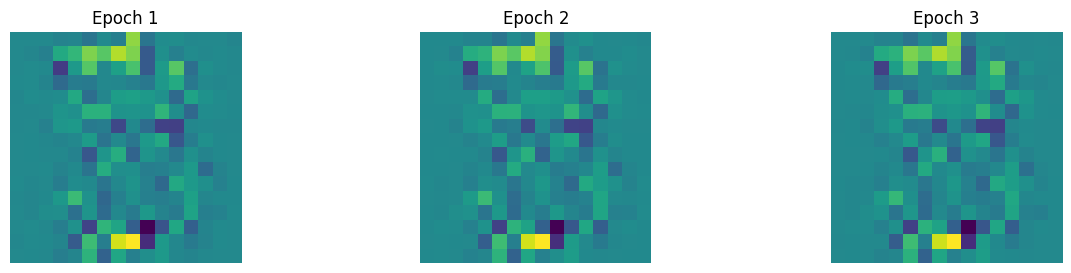

In [51]:
fig, axs = plt.subplots(1, n_epochs, figsize=(15, 3))

for i in range(n_epochs):
    axs[i].imshow(w_history[i, 1:].reshape(16, 16))  
    axs[i].set_title(f'Epoch {i + 1}')
    axs[i].axis('off')

plt.show()

fig, axs = plt.subplots(1, n_epochs_gd, figsize=(15, 3))

for i in range(n_epochs_gd):
    axs[i].imshow(w_history_2[i, 1:].reshape(16, 16))  
    axs[i].set_title(f'Epoch {i + 1}')
    axs[i].axis('off')

plt.show()

number extracted: 4, 8 with the 50.0% of the data for the training


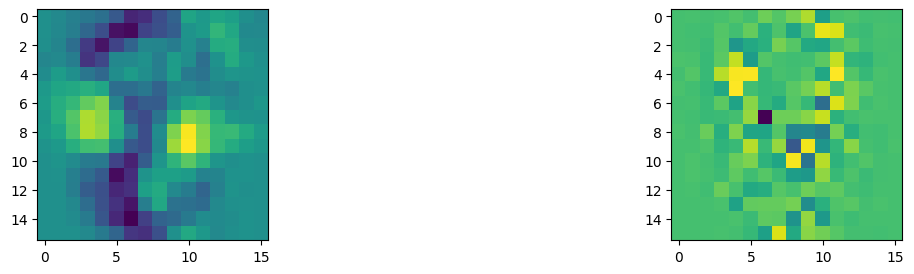

Accuracy of SGD: 0.8872180451127819 and GD: 0.5338345864661654


number extracted: 4, 8 with the 60.0% of the data for the training


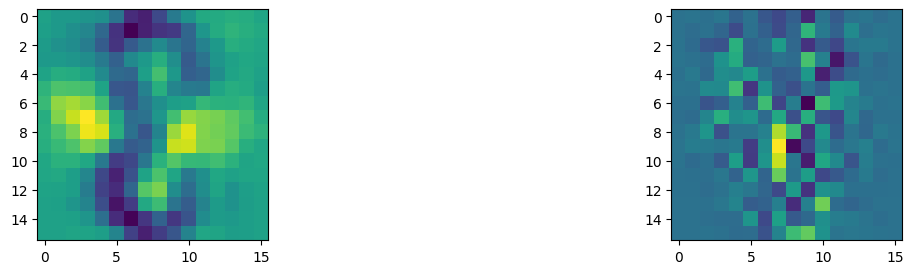

Accuracy of SGD: 0.7289719626168224 and GD: 0.514018691588785


number extracted: 4, 8 with the 80.0% of the data for the training


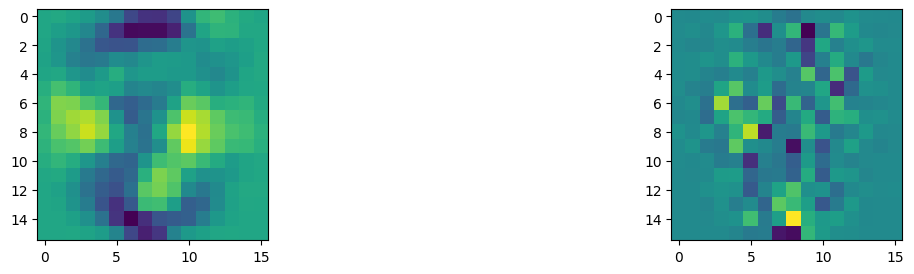

Accuracy of SGD: 0.9814814814814815 and GD: 0.5740740740740741


number extracted: 4, 8 with the 90.0% of the data for the training


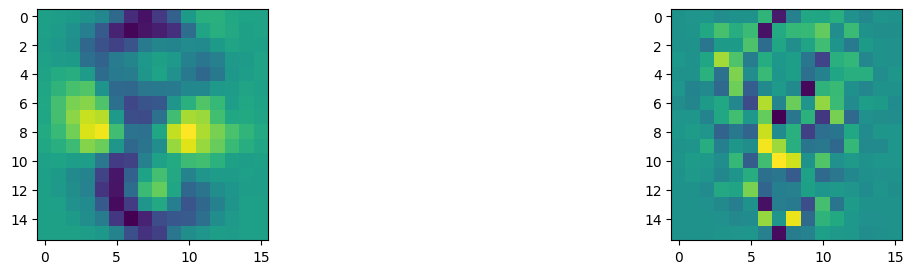

Accuracy of SGD: 0.9259259259259259 and GD: 0.6296296296296297


number extracted: 0, 7 with the 50.0% of the data for the training


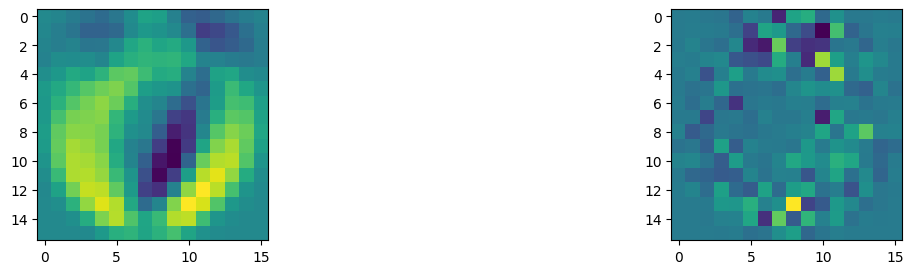

Accuracy of SGD: 0.8641975308641975 and GD: 0.654320987654321


number extracted: 0, 7 with the 60.0% of the data for the training


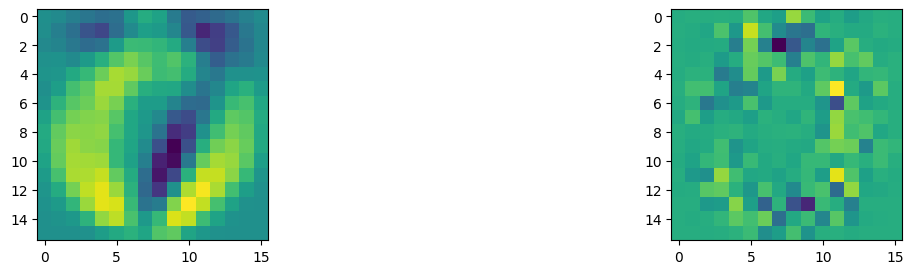

Accuracy of SGD: 0.9226804123711341 and GD: 0.6494845360824743


number extracted: 0, 7 with the 80.0% of the data for the training


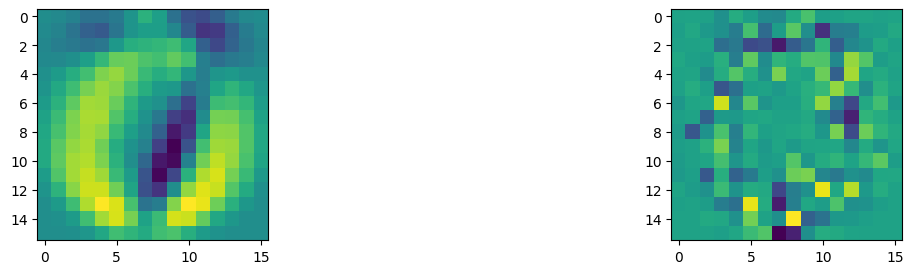

Accuracy of SGD: 0.7628865979381443 and GD: 0.6288659793814433


number extracted: 0, 7 with the 90.0% of the data for the training


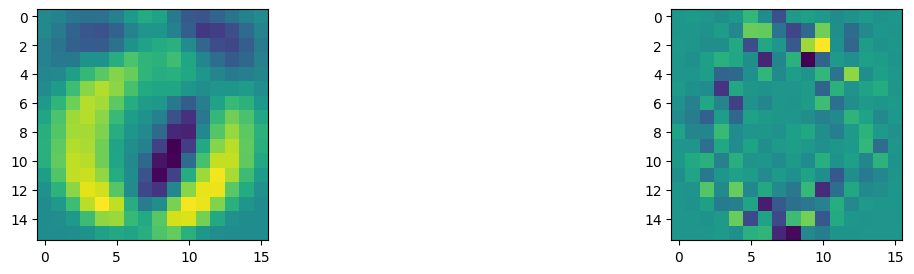

Accuracy of SGD: 0.8571428571428571 and GD: 0.6326530612244898


number extracted: 5, 3 with the 50.0% of the data for the training


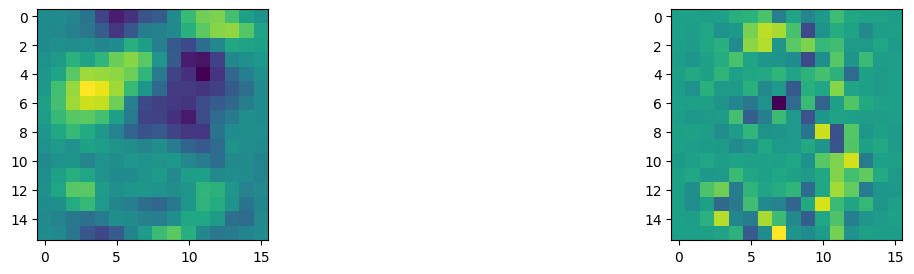

Accuracy of SGD: 0.5818181818181818 and GD: 0.5636363636363636


number extracted: 5, 3 with the 60.0% of the data for the training


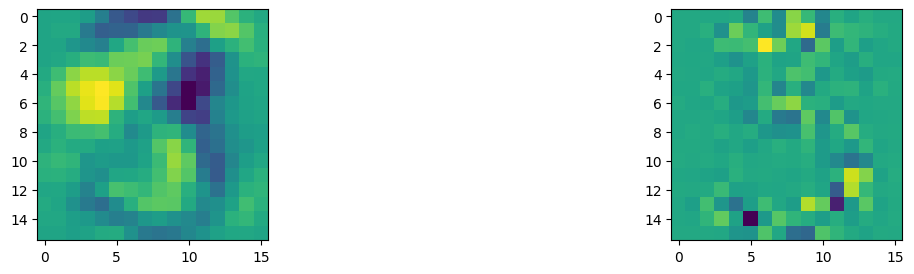

Accuracy of SGD: 0.6022727272727273 and GD: 0.5795454545454546


number extracted: 5, 3 with the 80.0% of the data for the training


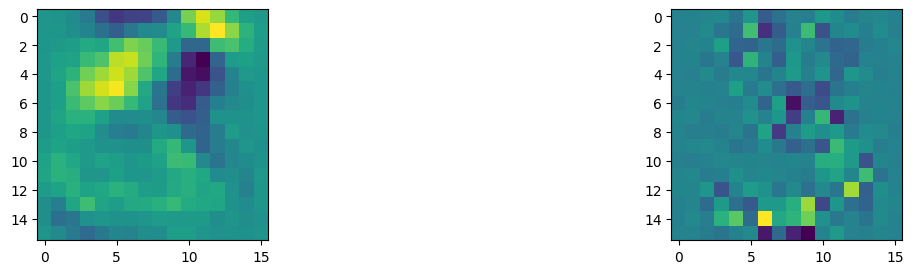

Accuracy of SGD: 0.5681818181818182 and GD: 0.5681818181818182


number extracted: 5, 3 with the 90.0% of the data for the training


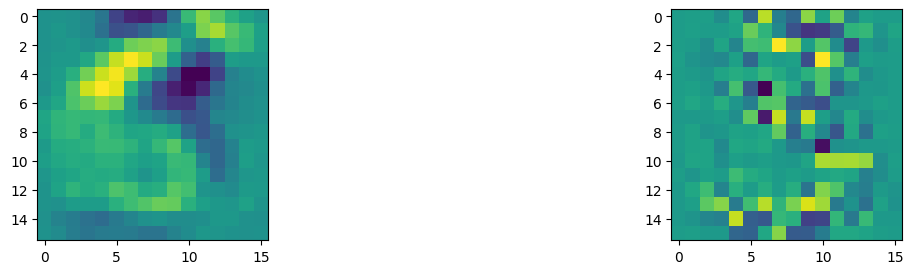

Accuracy of SGD: 0.6818181818181818 and GD: 0.6363636363636364


number extracted: 2, 3 with the 50.0% of the data for the training


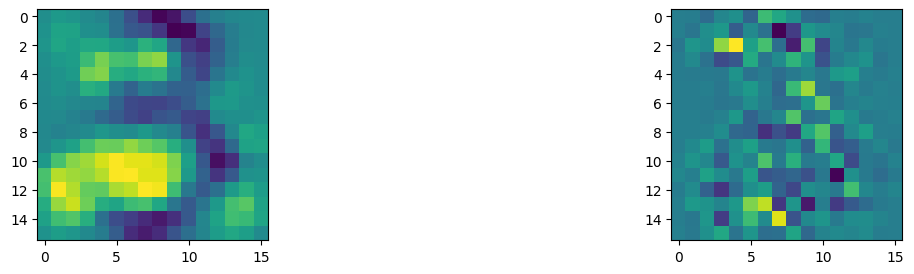

Accuracy of SGD: 0.5449101796407185 and GD: 0.5449101796407185


number extracted: 2, 3 with the 60.0% of the data for the training


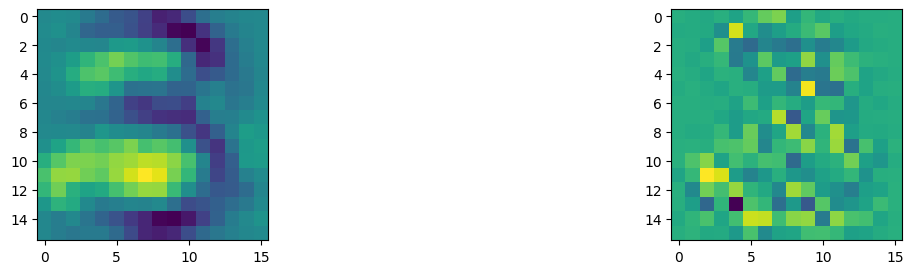

Accuracy of SGD: 0.8805970149253731 and GD: 0.6044776119402985


number extracted: 2, 3 with the 80.0% of the data for the training


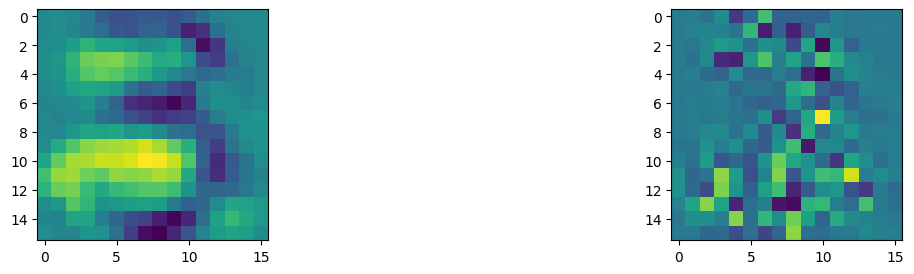

Accuracy of SGD: 0.7014925373134329 and GD: 0.582089552238806


number extracted: 2, 3 with the 90.0% of the data for the training


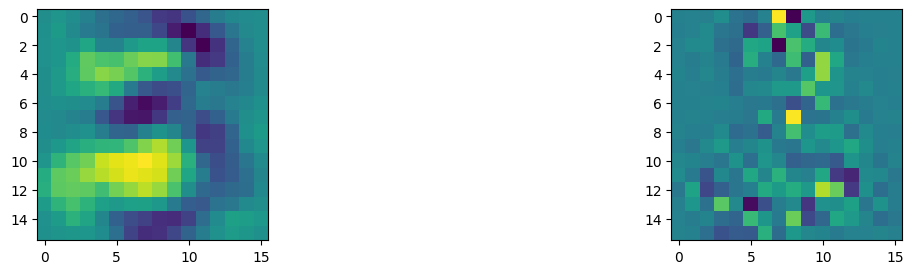

Accuracy of SGD: 0.6470588235294118 and GD: 0.5294117647058824




In [52]:
# Load the data
mnist = scipy.io.loadmat('MNIST.mat')

# Lista esistente
L_N_C = []
Accuracy_for_n = []
N_training_set = [0.5, 0.6, 0.8, 0.9]
n_of_cuples = 4

for r in range(n_of_cuples):
        num1 = random.randint(0, 9)
        num2 = random.randint(0, 9)
        
        while num2 == num1 or (num1, num2) in L_N_C or (num2, num1) in L_N_C:
            num1 = random.randint(0, 9)
            num2 = random.randint(0, 9)

        L_N_C.append((num1, num2))


for num_to_cl in L_N_C:
    
    for d_s in N_training_set:
        X = (mnist['X'])
        I = (mnist['I'])

        first_n = num_to_cl[0]
        second_n = num_to_cl[1]

        print(f"number extracted: {first_n}, {second_n} with the {d_s*100}% of the data for the training")

        c_col = np.where(np.logical_or(I == first_n, I == second_n))[1]
        c1_col = np.where(I == first_n)[1]
        c2_col = np.where(I == second_n)[1]


        X = X[:,c_col]
        Y = I[:,c_col]

        Ntrain = int((X.shape[1]*d_s))
        Y = Y[0,:]

        # To separate the train and the test
        X_train, Y_train, X_test, Y_test = test_train(X,Y,Ntrain)


        # To have 1 and 0 and not the number
        Y_train = np.array(Y_train)
        Y_train = (Y_train == first_n).astype(int)
        Y_test = np.array(Y_test)
        Y_test = (Y_test == first_n).astype(int)

        X_train = X_train - np.mean(X_train, axis=1, keepdims=True)
        X_test = X_test - np.mean(X_test, axis=1, keepdims=True)


        X_train_I, Y_train_I, X_test_I, Y_test_I = X_train, Y_train, X_test, Y_test

        k,N = X_train.shape


        X_train = X_train.T
        w0 = np.zeros((k + 1, 1))
        batch_size = 20
        n_epochs = 10
        alpha = 0.001


        # Creo x hat con la colonna di bias
        Xhat = np.insert(X_train, 0, 1, axis=1)

        w_history, loss_history, grad_norm_history = sgd_optimizer(f, grad_f, loss, grad_loss, w0, (Xhat, Y_train),alpha, batch_size, n_epochs)
        w_history_2, loss_history_2, grad_norm_history_2 = gd_optimizer(f, grad_f, loss, grad_loss, w0, (Xhat, Y_train),alpha, 2)


        Xtest = np.concatenate((np.ones((1, X_test.shape[1])), X_test), axis=0)


        X_test = np.insert(X_test, 0, 1, axis=0)
        X_test = X_test.T
        preds = predict(w_history[-1][...,np.newaxis], X_test)
        

        test_accuracy = accuracy(preds, Y_test)



        preds_2 = predict(w_history_2[-1][...,np.newaxis], X_test)

        # plot of the weigth
        fig, axs = plt.subplots(1, 2, figsize=(15, 3))
        axs[0].imshow(w_history[-1,1:].reshape(16,16))
        axs[1].imshow(w_history_2[-1,1:].reshape(16,16))
        plt.show()

        test_accuracy_2 = accuracy(preds_2, Y_test)

        print(f"Accuracy of SGD: {test_accuracy} and GD: {test_accuracy_2}\n\n")
        Accuracy_for_n.append((test_accuracy, test_accuracy_2))




In [53]:
print(Accuracy_for_n)

[(0.8872180451127819, 0.5338345864661654), (0.7289719626168224, 0.514018691588785), (0.9814814814814815, 0.5740740740740741), (0.9259259259259259, 0.6296296296296297), (0.8641975308641975, 0.654320987654321), (0.9226804123711341, 0.6494845360824743), (0.7628865979381443, 0.6288659793814433), (0.8571428571428571, 0.6326530612244898), (0.5818181818181818, 0.5636363636363636), (0.6022727272727273, 0.5795454545454546), (0.5681818181818182, 0.5681818181818182), (0.6818181818181818, 0.6363636363636364), (0.5449101796407185, 0.5449101796407185), (0.8805970149253731, 0.6044776119402985), (0.7014925373134329, 0.582089552238806), (0.6470588235294118, 0.5294117647058824)]


4

 16
8 16
12 16
16 16


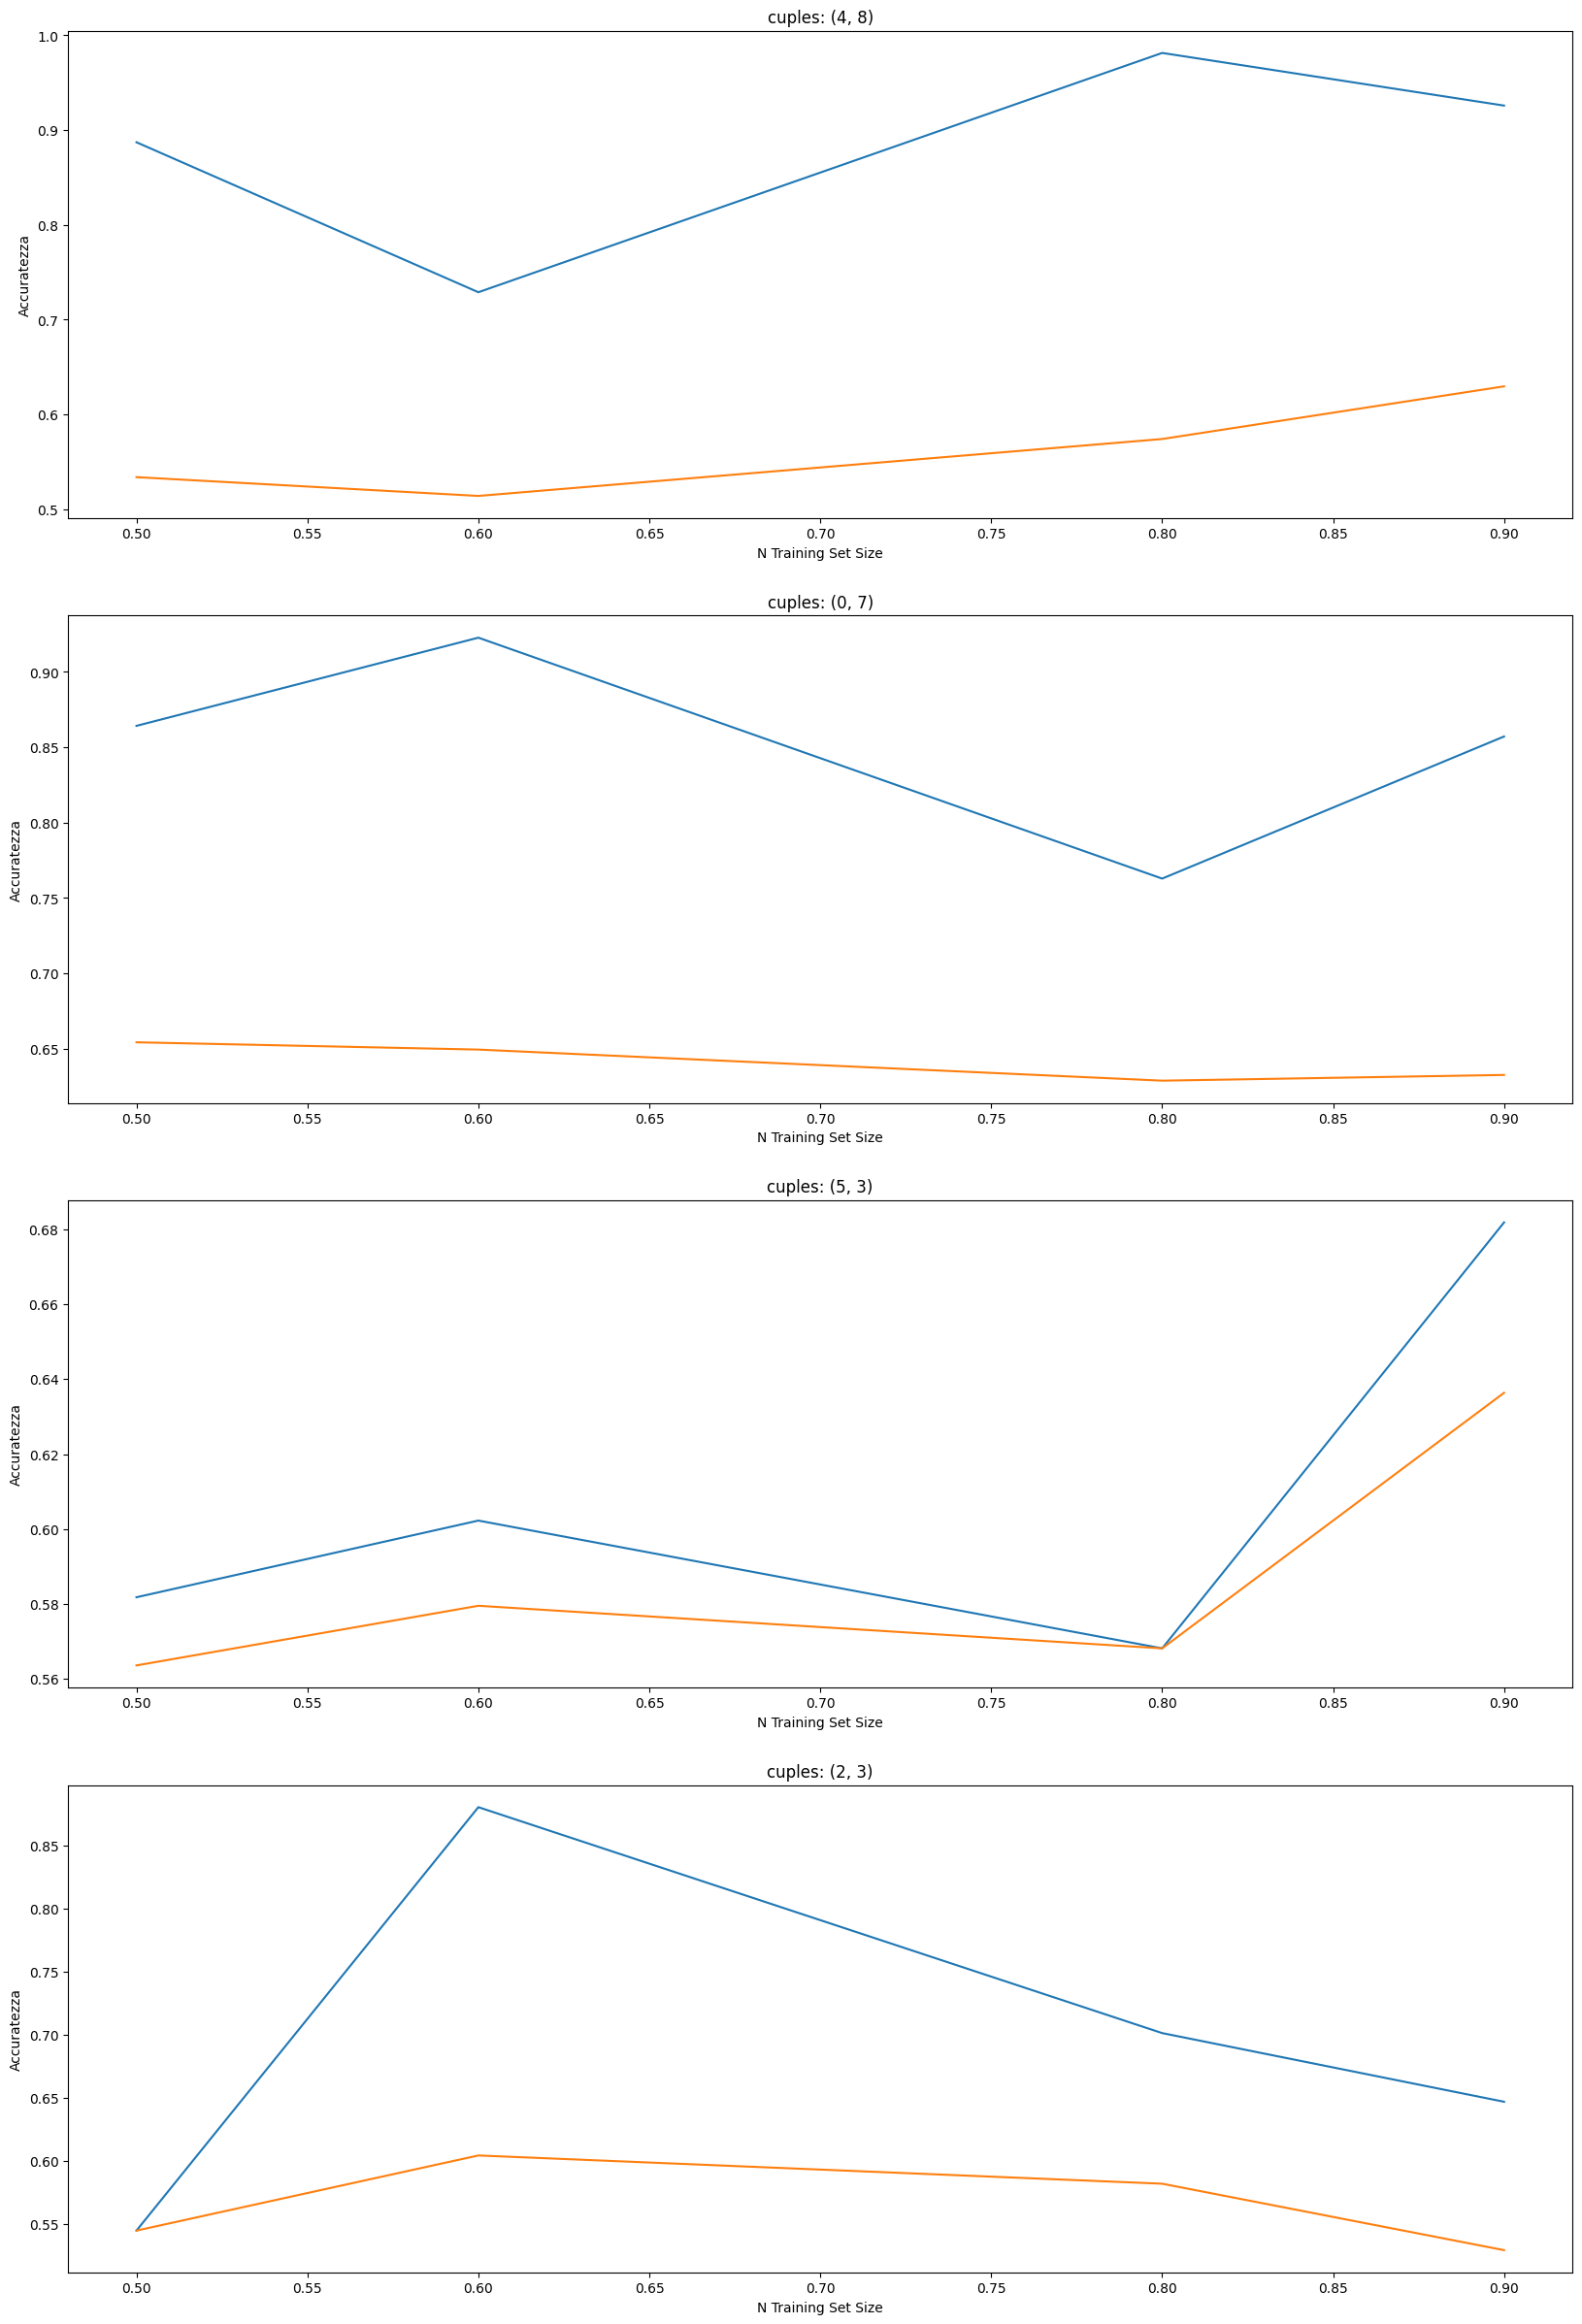

In [54]:
fig, axs = plt.subplots(n_of_cuples, figsize=(20, 30))
j = 0
for i in range(n_of_cuples):
    print(j+len(N_training_set), len(Accuracy_for_n))
    axs[i].plot(N_training_set,Accuracy_for_n[j:j+len(N_training_set)])
    axs[i].set_title(f'cuples: {L_N_C[i]}')
    axs[i].set_xlabel('N Training Set Size')
    axs[i].set_ylabel('Accuratezza')
    j += len(N_training_set)

plt.show()